## SSB30806: Modelling in Systems Biology

### Week 2, practical 1: Derivation of Michaelis-Menten kinetics
In this practical you will work on:
- Interpreting ODEs in a biological context;
- Constructing ODEs from chemical reaction schemes;
- Deriving dimensions of variables and parameters;
- Function manipulation;
- Calculating steady states;
- The derivation of the Michaelis-Menten kinetics / functional responses;
- Eye-ball fitting of an equation to data;
- Generally interpreting modelling results in a biological context.

Solutions will be made available on Brightspace.

### HOLLING’S DISC EQUATION AND SOME CLASSIC EXPERIMENTS
Crawford Stanley ‘Buzz’ Holling (1930-2019) was one of the conceptual founders of economic ecology. In 1959 he published one of his classic papers, ‘The components of Predation as Revealed by a Study of Small-Mammal Predation of the European Pine Sawfly’ (The Canadian Entomologist (1959), p. 293-320) on the topic of how population numbers are kept in check as a result of environmental limitations to the capacity of the population to increase. Based on several experiments with animals in the wild, in his paper he sketched four types of so-called ‘functional responses’, numbered types I through IV. The Michaelis-Menten kinetics correspond to the proposed type II functional response. In a different laboratory experiment, human subjects gathered discs that represented ‘prey’, which resulted in a similar response type, leading to the canonical name ‘disc equation’ for the type II functional response.

The disc equation was given by Holling (1959) as:

\begin{equation}
N_a = \frac{cTN}{1+cbN}
\label{eq:Holling} \tag{1}
\end{equation}

Here $N_a$ is the number of picked up discs by a single collector, $N$ is the number or density of available discs (where we implicitly assume that removed discs are immediately replaced to keep the density constant), and $T$ is the time of the experiment.

### Question 1: 
Give biological interpretations of parameters  and  and their dimensions.

<font color='red'>
Parameter $b$ is the time taken to pick up a disc (a so-called ‘handling’ time), with dimension ‘time per N’. Parameter $c$ is the rate at which discs are found, with dimension ‘per time’. This then also cancels against the time dimension of $T$.
</font>

We can interpret discs as prey, and the picking up of discs as predation, so that  has the interpretation of number of attacked prey by a single predator. In one experiment single spined soldier bugs (*Podisus maculiventris*) were placed in petri dishes with different numbers of larvae of the Mexican bean beetle (*Epilachna varivestis*). The data of this experiment are given in the below table (Wiedenmann & O’Neil, 1991).

| No. of prey | Median number attacked in 24h | Mean number attacked in 1h | Mean number attacked in 24h | SEM / mean ratio per 24h |
| :- | :- | :- | :- | :- |
| 1  | 1   | -         | 1.0 (0.0) | 0.00 | 
| 2  | 2   | -         | 2.0 (0.0) | 0.00 | 
| 4  | 4   | 0.7 (0.2) | 3.2 (0.5) | 0.16 | 
| 8  | 7   | 1.2 (0.2) | 6.6 (0.3) | 0.05 | 
| 12 | 10  | 1.4 (0.2) | 8.4 (1.0) | 0.12 | 
| 16 | 9.5 | 1.0 (0.1) | 9.0 (1.0) | 0.11 | 


### Question 2:
Plot the fourth column (mean number attacked in 24 hours) – we call this $N_a$ – as a function of the first column (no. of prey) – which we will call $N$. Describe what you see, and provide a biological explanation.

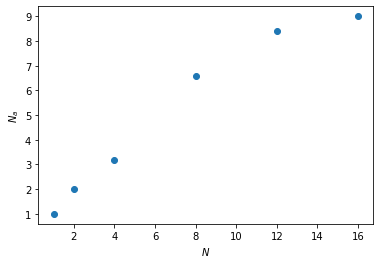

In [1]:
#import necessary packages
import numpy as np #math and arrays
from scipy.integrate import odeint #differential equations
import matplotlib.pyplot as plt #plotting
#run a "magic" command to make sure figures are rendered properly in the notebook
%matplotlib inline

N = [1,2,4,8,12,16]
Na = [1,2,3.2,6.6,8.4,9.0]

plt.plot(N,Na,'o')
plt.xlabel('$N$')
plt.ylabel('$N_a$')
plt.show()


<font color='red'>
We see a saturation: at low prey densities, the no. of attacked prey is equal to the number of available prey. As prey density is increasing, predators are not capable of handling all prey, so the number of attacked prey goes down relative to the total prey number. Parameter $b$ indicates this handling time.
</font>

### Question 3: 
Determine the dimensions of $N_a$, $N$, $T$, $c$, and $b$.

<font color='red'>
$N_a$ is a number attacked in a time interval, so in principle it has no dimension. Then prey $N$ is also dimensionless. $T$ represents the time of the experiment, so it will have dimension ‘time’ with unit ‘hours’, most likely. Now $c$ must compensate for the $T$, and it can be interpretated as a rate ‘per time’, as it is the probability of finding something within the time interval. Finally, $b$ must compensate for $N$ and $c$, so it has dimension ‘per $c$’, i.e., ‘time’. This makes sense, as $b$ is the handling time.
</font>

### Question 4: 
Plot the disc equation to the data plotted in Question 1. Try to obtain a reasonable fit of Eq.$~(1)$ to these data points, and report the found parameter values. (Hint: Start with $c=0.2$, $b=0.9$, and $\frac{T}{b} = 15$, and make small adaptations to each of the parameter values.)

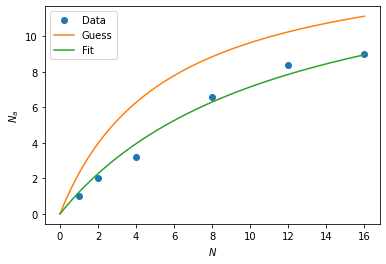

In [2]:
N_data = [1,2,4,8,12,16]
Na_data = [1,2,3.2,6.6,8.4,9.0]

# Data
plt.plot(N_data,Na_data,'o',label = 'Data')

# Initial guess
c=0.2; b=0.9; T=15*b
N = np.linspace(0,N_data[-1],200)
Na_guess = c*T*N/(1+c*b*N)
plt.plot(N,Na_guess,label = 'Guess')

# Eyeball fit
c=0.0952; b=0.9; T=15.5*b
Na_fit = c*T*N/(1+c*b*N)
plt.plot(N,Na_fit,label = 'Fit')

plt.legend()

plt.xlabel('$N$')
plt.ylabel('$N_a$')
plt.show()


### Question 5:
Hassell (1978) defined the maximum attack number as the asymptote of Eq.$~(1)$. Determine the maximum attack number for the experiment by Wiedenmann & O’Neil.

<font color='red'>
The maximum attack number is the asymptote:
    
\begin{equation}
    \lim_{N \to \infty} \frac{cTN}{1+cbN} = \lim_{N \to \infty} \frac{cT}{\frac{1}{N}+cb} = \frac{cT}{cb} = \frac{T}{b}
\end{equation}
    
</font>

McNickle & Brown (2014) discuss the relation between the disc equation, Eq.$~(1)$, and the Michaelis-Menten kinetics, usually given as:

\begin{equation}
h = \frac{V_{max}N}{K_{M}+N}
\tag{2}
\end{equation}

Here $h$ is the harvest rate, $V_{max}$ is the maximum reaction rate (comparable to the maximum attack number defined in Question 5), and $K_M$ is a half-saturation constant.

### Question 6:
Compare Eq.$~(1)$ and Eq.$~(2)$. Provide an overview of all conversions between the parameters, including the dimensions. 

<font color='red'>
Using division by $cb$, we first rewrite:
\begin{equation}
    N_a = \frac{cTN}{1+cbN} = \frac{\frac{T}{b}N}{\frac{1}{cb}+N}
\end{equation}

Then: 
    
$V_{max} = \frac{T}{b}$, units time per time, so dimensionless.
    
$K_M = \frac{1}{cb}$, units per (time per time), so also dimensionless.

</font>

### THE DERIVATION OF THE DISC EQUATION FROM FIRST PRINCIPLES
The disc equation and Eq. (2) can be derived from first principles. Suppose we can split the predator population in two dynamic sub-groups, the searching predators and the handling predators. Suppose furthermore that predators that have caught a prey and that are handling the prey are temporarily in a predator-prey ‘complex’; after ‘handling’, the prey is converted to additional predator biomass (the ‘product’).

Now differentiate between two scenarios: one in which prey can escape, and one in which they cannot. The ‘escape possible’ scenario can be seen as analogous to the enzyme kinetics we discussed in the tutorial yesterday, depicted as:

\begin{equation}
\begin{aligned}
S + X &\overset{a}{\to} H \\
H &\overset{d}{\to} S + P \\
H &\overset{e}{\to} S + X
\end{aligned}
\end{equation}

Here $S$ are searching predators, $X$ are prey, and $H$ are handling predators in ‘complex’ with prey. We assume that $P$ is new biomass obtained after handling prey, and that it is not directly involved in acquiring more biomass (i.e., young predators are not yet adept at hunting). Furthermore, we assume that the prey is in overabundance, so that we can make a quasi-steady state assumption and consider only the above reaction scheme.

### Question 7:
Give the set of ODEs that describe the numbers or densities of searching and handling predators, and explain how you have taken into account the escape behaviour (i.e., the third reaction in the above scheme).

<font color='red'>
    The reactions translate to ODEs as:
    
\begin{equation}
    \begin{aligned}
    \frac{dS}{dt} &= -aSX + dH + eH\\
    \frac{dH}{dt} &= aSX - dH - eH
    \end{aligned}
    \end{equation}
    
    
Note, that we have added terms to each of the two equations that can be interpreted as the escape of prey. Without escape, $e=0$ and we have the original equations for the derivation of MM kinetics.
</font>

### Question 8:
Determine the steady state of the ODEs determined in Question 7. Show that we end up with one equation with two unknown variables.

<font color='red'>
Essentially we have the same equation twice:

\begin{equation}
\frac{dS}{dt} = - \frac{dH}{dt} = 0
\end{equation}

Hence:
\begin{equation}
\frac{dS}{dt} = - aSX + dH + eH = 0
\end{equation}

which gives us either:
\begin{equation}
S = \frac{(d+e)H}{aX}
\end{equation}

or:
\begin{equation}
H = \frac{aSX}{d+e}
\end{equation}

Note: We can replace $d+e=c$
    
</font>


To further solve the set of ODEs, assume that the number of predators is constant, i.e.,  $H+S=Z$.

### Question 9:
Substitute $S$ and determine the steady state solution in terms of $H$.

<font color='red'>
$H+S=Z$ gives $S = Z- H$

Then, from Q7/8: 
\begin{equation}
\frac{dS}{dt} = - a(Z-H)X + (d+e)H = - aZX + aXH + (d+e)H = -aZX + (aX+d+e)H = 0
\end{equation}

\begin{equation}
(aX+d+e)H = aZX
\end{equation}

\begin{equation}
H = \frac{aZX}{aX+d+e}
\end{equation}

And again, we could replace  $d+e=c$  for convenience.

</font>

### Question 10:
Provide the units of all variables and parameters in the solution equation found in Question 9.

<font color='red'>
$H,Z,X$ are all numbers and can be considered dimensionless. $a,d,e$ are rates, so per time.
    </font>

### Question 11:
Show how you can convert Eq. (1), Eq. (2), and the answer of Question 9 into each other.

<font color='red'>

Variable $X=N$. Then:

\begin{equation}
H = \frac{aZN}{d+e+aN}
\end{equation}
    
and again note $d+e=c$.

We now divide by $a$ to rewrite:
\begin{equation}
H = \frac{ZN}{\frac{d+e}{a}+N}
\end{equation}

Which has the same form as the Michaelis Menten kinetics (Eq 2):
\begin{equation}
h = \frac{V_{max}N}{K_{M}+N}
\end{equation}
    
and the rearranged Holling disc equation (Eq 1):
\begin{equation}
N_a = \frac{\frac{T}{b}N}{\frac{1}{cb}+N}
\end{equation}


</font>
    

### MULTIPLE LIMITATIONS
In the disc equation a.k.a. Michaelis-Menten kinetics there is one limiting substrate, and if it has an ecological interpretation, this substrate is prey. Now consider a reaction in which two substrates, $A$ and $B$, are both needed to form a product:


\begin{equation}
\frac{dO}{dt} = k_d C - k_A OA - k_B OB \tag{3a}
\end{equation}
\begin{equation}
\frac{dO_A}{dt} = k_A OA - k_{AB} O_A B \tag{3b}
\end{equation}
\begin{equation}
\frac{dO_B}{dt} = k_B OB - k_{BA} O_B A \tag{3c}
\end{equation}
\begin{equation}
\frac{dC}{dt} = k_{AB} O_A B + k_{BA} O_B A - k_d C \tag{3d}
\end{equation}






### Question 12:
Explain briefly in words the reactions described by the different ODEs.

<font color='red'>
Eq.$~ (3a)$ gives the binding of an enzyme to either substrate A or B. Free enzyme becomes available with rate $k_d$. Complex-A ($O_A$) can bind to B to form OAB, renamed C, with rate $k_{AB}$. Similarly, complex-B ($O_B$) can bind to A to form C with rate $k_{BA}$. After some ‘handling time’, C forms a product (not explicitly included in the equations) and free enzyme becomes available with rate $k_d$.
    </font>

### Question 13:
Implement Eqs.$~(3a-d)$ as numerical simulation model in Python or R. Add the following two equations:

\begin{equation}
\frac{dA}{dt} = -k_A OA - k_{BA} O_B A
\tag{3e}
\end{equation}
\begin{equation}
\frac{dB}{dt} = -k_B OB - k_{AB} O_A B
\tag{3f}
\end{equation}

Assume the following:
$k_A = k_B = k_{AB} = k_{BA} = 0.1$, and $k_d = 0.8$;
$O(0)=O_A(0)=O_B(0) = 0.15$, $C(0) = 0$, $A(0) = B(0) = 100$.
Show through simulation that at $T=1$ we have approximately $\tilde{O} = \tilde{O}_A = \tilde{O}_B = 0.016$, and determine the corresponding $\tilde{C}$. Also show the simulation for a longer time period, say $T=500$.


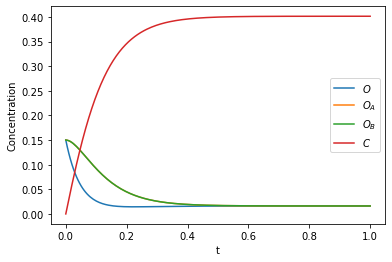

0.40155488583978544


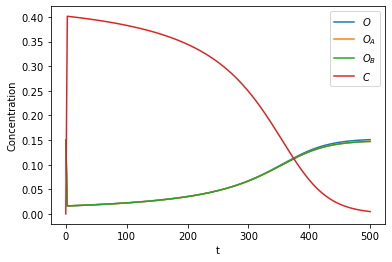

In [3]:
from scipy.integrate import odeint

def ode1(states,t,pars):
    kd,kA,kB,kAB,kBA = pars
    O,OA,OB,C,A,B = states
    
    dOdt = kd*C - kA*O*A - kB*O*B
    dOAdt = kA*O*A - kAB*OA*B
    dOBdt = kB*O*B - kBA*OB*A
    dCdt = kAB*OA*B + kBA*OB*A - kd*C
    dAdt = -kA*O*A - kBA*OB*A
    dBdt = -kB*O*B - kAB*OA*B
    
    return [dOdt,dOAdt,dOBdt,dCdt,dAdt,dBdt]



kd = 0.8
kA = 0.1
kB = 0.1
kAB = 0.1
kBA = 0.1

# T = 1
t = np.linspace(0,1,200)
pars = ([kd,kA,kB,kAB,kBA],)
inits = [0.15,0.15,0.15,0,100,100]

x_t = odeint(ode1,inits,t,args = pars)

O_t = x_t[:,0]
OA_t = x_t[:,1]
OB_t = x_t[:,2]
C_t = x_t[:,3]


plt.plot(t,O_t,label = '$O$')
plt.plot(t,OA_t,label = '$O_A$')
plt.plot(t,OB_t,label = '$O_B$')
plt.plot(t,C_t,label = '$C$')

plt.legend()
plt.xlabel('t')
plt.ylabel('Concentration')

plt.show()


print(C_t[-1])


# T = 500
t = np.linspace(0,500,200)
x_t = odeint(ode1,inits,t,args = pars)

O_t = x_t[:,0]
OA_t = x_t[:,1]
OB_t = x_t[:,2]
C_t = x_t[:,3]


plt.plot(t,O_t,label = '$O$')
plt.plot(t,OA_t,label = '$O_A$')
plt.plot(t,OB_t,label = '$O_B$')
plt.plot(t,C_t,label = '$C$')

plt.legend()
plt.xlabel('t')
plt.ylabel('Concentration')

plt.show()


<font color='red'>
A(t) and B(t) drop near linearly for at least until T=300. You should recognize this as results that are similar to when we made the quasi-steady state approach for deriving MM kinetics in the lecture.
    </font>

### Question 14:
Explain how you could use a quasi-steady state approximation as long as the concentrations of substrates $A$ and $B$ are much higher than the concentrations of $O,O_A,O_B,$ and $C$?

<font color='red'>
You should recognize this from the slides on Monday. If $A$ and $B$ are in overabundance, their dynamics do not really matter for a long part of the simulation (see the results for Question 15), and $O$, $O_A$, $O_B$, and $C$ remain at relative steady state for a while, before the system ‘expires’.
    </font>

With some algebraic rewriting steps Eqs. (3a-d) can be solved to a steady state value of (Dutta et al., 2014):
\begin{equation}
\hat{C} = \frac{1}{1+ \left( \frac{A}{K_A} \right)^{-1} + \left( \frac{B}{K_B} \right)^{-1} - \left( \frac{A}{K_A} + \frac{B}{K_B} \right)^{-1}}
\tag{4}
\end{equation}
I.e., $\hat{C}$ is now a functional response for two limiting substrates.


### Question 15:
Assume that substrate $B$ is not limiting, so $B \gg A$. Show that Eq. (4) then simplifies to the Michaelis-Menten kinetics which is rescaled between 0 and 1 (i.e., $V_{max}=1$). 

<font color='red'>
\begin{equation}
\lim_{B \to \infty}  \frac{1}{1+ \left( \frac{A}{K_A} \right)^{-1} + \left( \frac{B}{K_B} \right)^{-1} - \left( \frac{A}{K_A} + \frac{B}{K_B} \right)^{-1}}  =  \frac{1}{1+ \left( \frac{A}{K_A} \right)^{-1} + \left( \frac{\infty}{K_B} \right)^{-1} - \left( \frac{A}{K_A} + \frac{\infty}{K_B} \right)^{-1}}
\end{equation}

\begin{equation}
 =  \frac{1}{1+ \left( \frac{A}{K_A} \right)^{-1} + (0) - (0)} =  \frac{1}{1 + \frac{K_A}{A} } =  \frac{A}{A + A\frac{K_A}{A} } = \frac{A}{A + K_A}
\end{equation}

</font>